[![Troy Tompkins](https://github.com/ttompk/musings/blob/master/images/t-dist.png?raw=true "Troy's Github")](https://github.com/ttompk/als) ![Troy](https://github.com/ttompk/musings/blob/master/images/name.png?raw=true)

# UCSF Neuro Image Detection
---

[Today's Date]  
Written in python: 3.6.8

In [2]:
from platform import python_version
print('Your python version: {}'.format(python_version()))

Your python version: 3.6.8


## Notebook TOC
---
1. Overview
2. Libraries
3. Generalized Functions
4. Data ETL
5. Analysis
6. Conclussion
7. Next Steps

## 1. Overview
---
This notebook was developed for the UCSF neuron cell body image classification project.

### Directive/Objective
The instructions were provided in ...  

**Part 1**  
This

**Part 2**  
That


### Data Source
The orginal data consisted of ...   



## 2. Libraries
---

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import patches

In [4]:
%load_ext autoreload
%autoreload 2

## 3. Generalized Functions
---

## 4. Data ETL
---

In [5]:
green_df = pd.read_csv("green.csv")
red_df = pd.read_csv("red.csv")
multi_df = pd.read_csv("multi.csv")

In [6]:
# cleave the end of filename
def cleave_filename(val):
    return val[:val.index("_train.png")]

cell_types = ["green", "red", "multi"]
i=0
for df in [green_df, red_df, multi_df]:
    df['file_name'] = df['file_name'].apply(cleave_filename)
    df['cell_type'] = cell_types[i]
    print(df.head())
    print('---')
    i+=1

               file_name  xmin  ymin  xmax  ymax  tot_width  tot_height  \
0  4453.13_102_drn_color   246  1593   346  1633       4573        8486   
1  4453.13_102_drn_color   760  1346   833  1373       4573        8486   
2  4453.13_102_drn_color  3160   900  3206   926       4573        8486   
3  4453.13_102_drn_color  3226   880  3293   913       4573        8486   
4  4453.13_102_drn_color  4093  1700  4166  1773       4573        8486   

  cell_type  
0     green  
1     green  
2     green  
3     green  
4     green  
---
               file_name  xmin  ymin  xmax  ymax  tot_width  tot_height  \
0  4453.13_102_drn_color   953  1426  1006  1473       4573        8486   
1  4453.13_102_drn_color  1053  1580  1160  1633       4573        8486   
2  4453.13_102_drn_color  7040  2446  7106  2493       4573        8486   
3  4453.13_102_drn_color  7633  2853  7680  2900       4573        8486   
4  4453.13_102_drn_color  6706  2773  6760  2813       4573        8486   

  cell_typ

In [7]:
# concat data frames
train_box_df = pd.concat([green_df, red_df, multi_df]).reset_index(drop=True)
train_box_df

,file_name,xmin,ymin,xmax,ymax,tot_width,tot_height,cell_type
0,4453.13_102_drn_color,246,1593,346,1633,4573,8486,green
1,4453.13_102_drn_color,760,1346,833,1373,4573,8486,green
2,4453.13_102_drn_color,3160,900,3206,926,4573,8486,green
3,4453.13_102_drn_color,3226,880,3293,913,4573,8486,green
4,4453.13_102_drn_color,4093,1700,4166,1773,4573,8486,green
5,4453.13_102_drn_color,2986,1886,3046,1946,4573,8486,green
6,4453.13_102_drn_color,3900,2513,3953,2546,4573,8486,green
7,4453.13_102_drn_color,7473,2980,7560,3046,4573,8486,green
8,4453.13_102_drn_color,3113,1546,3166,1586,4573,8486,green
9,4453.13_102_drn_color,3606,1853,3646,1900,4573,8486,green


## 5. Analysis
---

#### **1. Do boxes line up with expectations?**

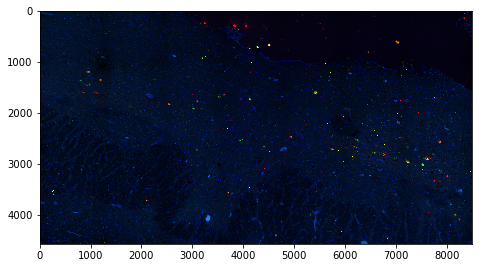

In [8]:
# display the original image
# show image inline
%matplotlib inline

fig = plt.figure()

#add axes to the image
ax = fig.add_axes([0,0,1,1])

# test plot of an image
image = plt.imread('img/4453.13_102_drn_color.tif')
plt.imshow(image)

In [11]:
def plot_boxes_traing(path, img_file, img_root):
    # plot boxes on a training image
    %matplotlib tk  
    
    fig = plt.figure()

    #add axes to the image
    ax = fig.add_axes([0,0,1,1])

    # read and plot the image
    image = plt.imread(path+"/"+img_file)
    plt.imshow(image)

    # iterating over the image for different objects
    # note: test code - does not cover all files in a directory
    fn = img_file[:-4]  # cut off the file name extension
    for _,row in train_box_df[ train_box_df['file_name'] == img_root].iterrows():
        xmin = row.xmin
        xmax = row.xmax
        ymin = row.ymin
        ymax = row.ymax

        width = xmax - xmin
        height = ymax - ymin

        # assign different color to different classes of objects
        if row.cell_type == 'green':
            edgecolor = 'g'
            ax.annotate('green', xy=(xmax,ymin), color='g')
        elif row.cell_type == 'red':
            edgecolor = 'r'
            ax.annotate('red', xy=(xmax,ymin), color='r')
        elif row.cell_type == 'multi':
            edgecolor = 'orange'
            ax.annotate('multi', xy=(xmax,ymin), color='orange')

        # add bounding boxes to the image
        rect = patches.Rectangle((xmin,ymin), width, height, edgecolor = edgecolor, facecolor = 'none')

        ax.add_patch(rect)

In [13]:
# the original color image using TK  
plot_boxes_traing('img', '4453.13_102_drn_color.tif', '4453.13_102_drn_color')  

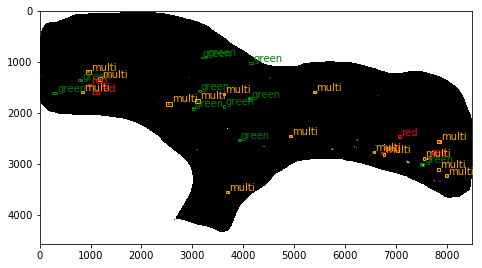

In [9]:
# the box annotation image
plot_boxes_traing('img_boxes', '4453.13_102_drn_color_train.png', '4453.13_102_drn_color')

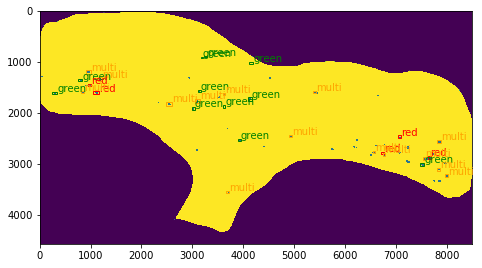

In [10]:
# the mask image - how many did we miss?
plot_boxes_traing('img', '4453.13_102_drn_mask.tif', '4453.13_102_drn_color') 

The boxes show up in the right places but i should do a better job of drawing them. Perhaps a white background would work better? No need to invert in GIMP?

#### **2. Parse Pics into training set**

#### **3. Train Faster R-CNN**

## 6. Conclussion
---

In this assignemnt I used descriptive stats, exploratory data analysis, and unsupervised learning on [type] data. The goal was to provide ...

## 7. Next Steps
---

Thank you for the opportunity to briefly explore this dataset. I enjoyed it. If you have any questions please email me at ttompkasu@gmail.com. 